In [1]:
from xmovie import Movie  #Note: Xmovie can be installed using conda:  conda install -c conda-forge xmovie

import xarray as xr

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [9]:
ds2 = xr.open_dataset('C:\\Users\\gjg882\\Desktop\\Projects\\SpaceDynamicWidth\\NormalFaultSims\\NormalFault_nx50_ss_4.nc')
ds1 = xr.open_dataset('C:\\Users\\gjg882\\Desktop\\Projects\\SpaceDynamicWidth\\NormalFaultSims\\NormalFault_nx50_ss_4_noSed.nc')

Text(0.5, 0.98, 'Initial Condition')

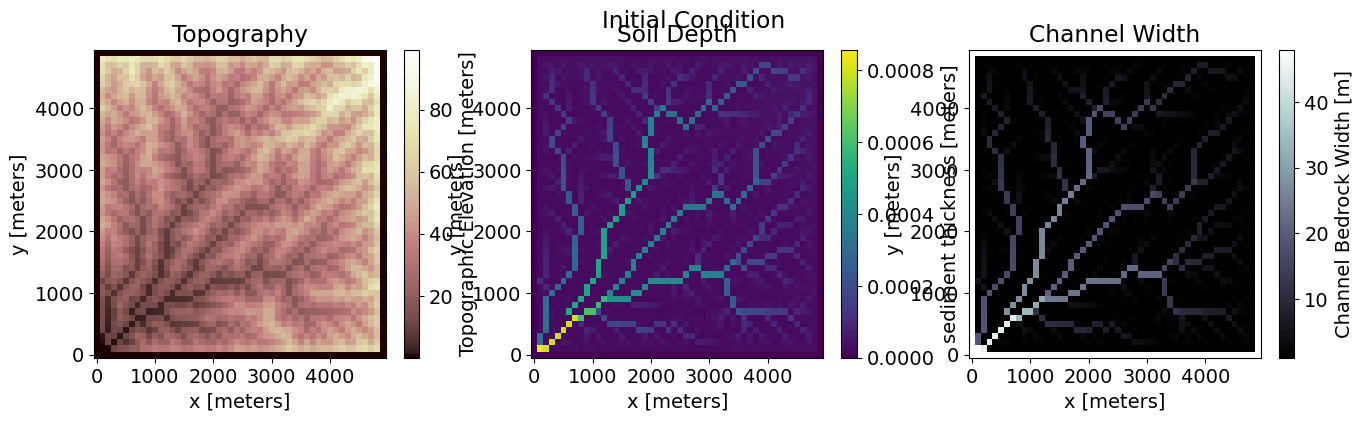

In [4]:
plot_time = 0

fig, axs = plt.subplots(1, 3, figsize=(16, 4))

ds.topographic__elevation.sel(time=plot_time).plot(ax=axs[0], cmap='pink')
ds.soil__depth.sel(time=plot_time).plot(ax=axs[1])
ds.channel_bedrock__width.sel(time=plot_time).plot(ax=axs[2], cmap='bone')

axs[0].set_title('Topography')
axs[1].set_title('Soil Depth')
axs[2].set_title('Channel Width')

plt.suptitle('Initial Condition')


Text(0.5, 1.0, 'Channel Width')

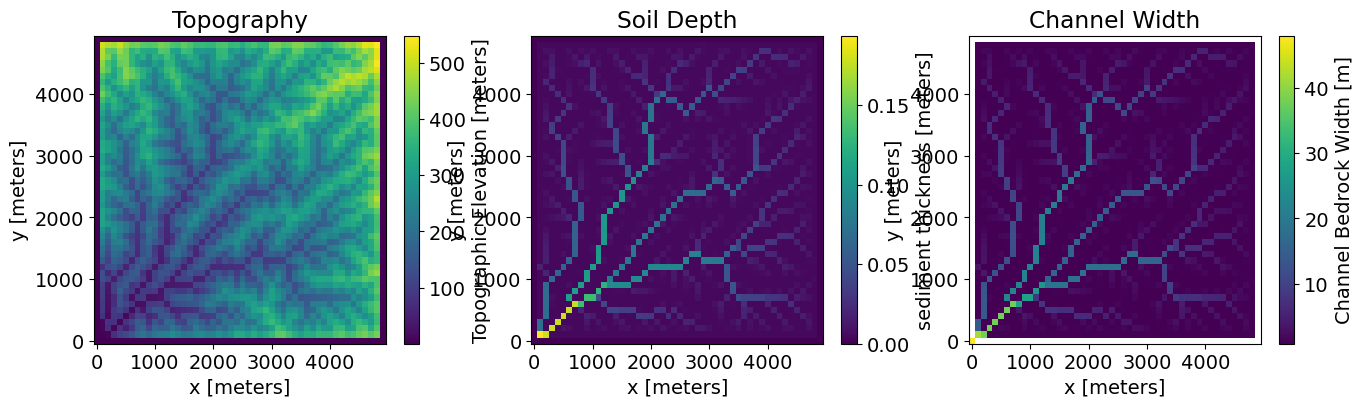

In [5]:
plot_time = 800000

fig, axs = plt.subplots(1, 3, figsize=(16, 4))

ds.topographic__elevation.sel(time=plot_time).plot(ax=axs[0])
ds.soil__depth.sel(time=plot_time).plot(ax=axs[1])
ds.channel_bedrock__width.sel(time=plot_time).plot(ax=axs[2])

axs[0].set_title('Topography')
axs[1].set_title('Soil Depth')
axs[2].set_title('Channel Width')



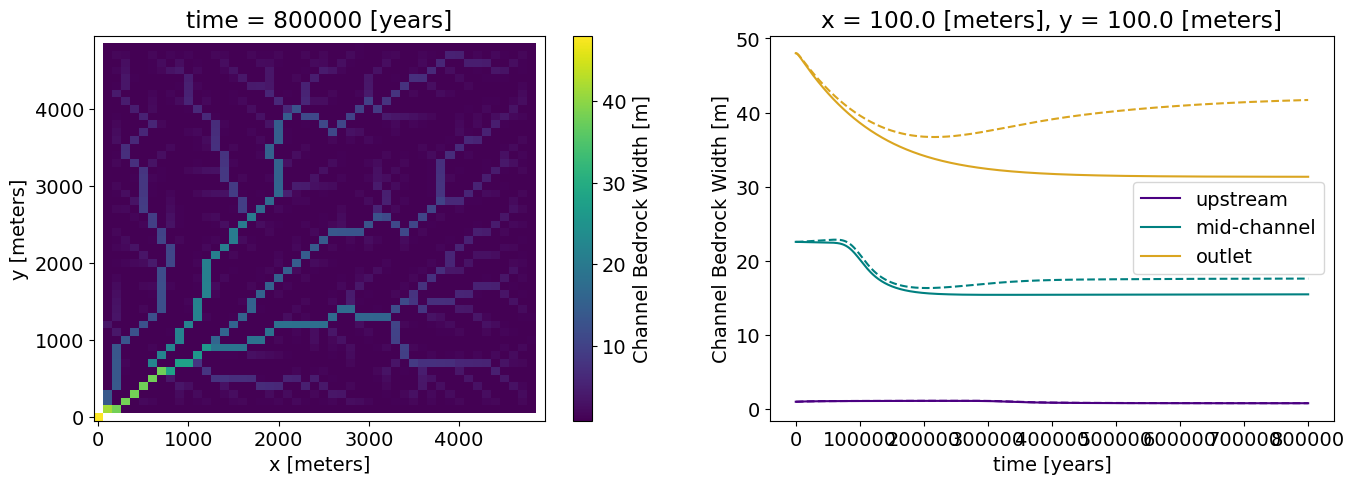

In [13]:

ds_coords = [100, 100] 
us_coords = [4800, 2200]
mid_coords = [2500, 1200]

dx = 100

width1d_1 = ds1.channel_bedrock__width.sel(x=us_coords[0], y=us_coords[1])

width1d_100_1 = ds1.channel_bedrock__width.sel(x=ds_coords[0], y=ds_coords[1])

width1d_25_1 = ds1.channel_bedrock__width.sel(x=mid_coords[0], y=mid_coords[1])


width1d_2 = ds2.channel_bedrock__width.sel(x=us_coords[0], y=us_coords[1])

width1d_100_2 = ds2.channel_bedrock__width.sel(x=ds_coords[0], y=ds_coords[1])

width1d_25_2 = ds2.channel_bedrock__width.sel(x=mid_coords[0], y=mid_coords[1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ds.channel_bedrock__width.sel(time=plot_time).plot(ax=ax1, cmap='viridis')

width1d_1.plot(color='indigo', label='upstream', ax=ax2)
width1d_25_1.plot(color='teal', label='mid-channel',ax=ax2)
width1d_100_1.plot(color='goldenrod', label='outlet',ax=ax2)

width1d_2.plot(color='indigo', linestyle='--',ax=ax2)
width1d_25_2.plot(color='teal', linestyle='--',ax=ax2)
width1d_100_2.plot(color='goldenrod', linestyle='--', ax=ax2)
ax2.legend(loc='best')



In [24]:
def width_plotfunc(ds, fig, plot_time):

    fig, ax = plt.subplots(figsize=(6,5))
    ds.channel_bedrock__width.sel(time=plot_time).plot(cmap='viridis', ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    return None, None

In [26]:
fig=plt.figure()

mov_custom_w = Movie(ds, fig, width_plotfunc)
mov_custom_w.preview(30)   

ValueError: xmovie presets do not yet fully support the input of xr.Datasets.
In order to use datasets as inputs, set `input_check` to False.
Note that this requires you to manually set colorlimits etc.

<Figure size 640x480 with 0 Axes>

In [ ]:
def custom_plotfunc(ds1, ds2, fig, plot_time, *args, **kwargs):
    
    ds_coords = [100, 100] 
    us_coords = [4800, 2200]
    mid_coords = [2500, 1200]
    
    dx = 100
    
    width1d_1 = ds1.channel_bedrock__width.sel(x=us_coords[0], y=us_coords[1])

    width1d_100_1 = ds1.channel_bedrock__width.sel(x=ds_coords[0], y=ds_coords[1])

    width1d_25_1 = ds1.channel_bedrock__width.sel(x=mid_coords[0], y=mid_coords[1])


    width1d_2 = ds2.channel_bedrock__width.sel(x=us_coords[0], y=us_coords[1])

    width1d_100_2 = ds2.channel_bedrock__width.sel(x=ds_coords[0], y=ds_coords[1])

    width1d_25_2 = ds2.channel_bedrock__width.sel(x=mid_coords[0], y=mid_coords[1])
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    ds.channel_bedrock__width.sel(time=plot_time).plot(ax=ax1, cmap='viridis')
    
    width1d_1.plot(color='indigo', label='upstream', ax=ax2)
    width1d_25_1.plot(color='teal', label='mid-channel',ax=ax2)
    width1d_100_1.plot(color='goldenrod', label='outlet',ax=ax2)

    width1d_2.plot(color='indigo', linestyle='--',ax=ax2)
    width1d_25_2.plot(color='teal', linestyle='--',ax=ax2)
    width1d_100_2.plot(color='goldenrod', linestyle='--', ax=ax2)
    ax1.legend(loc='best')



    

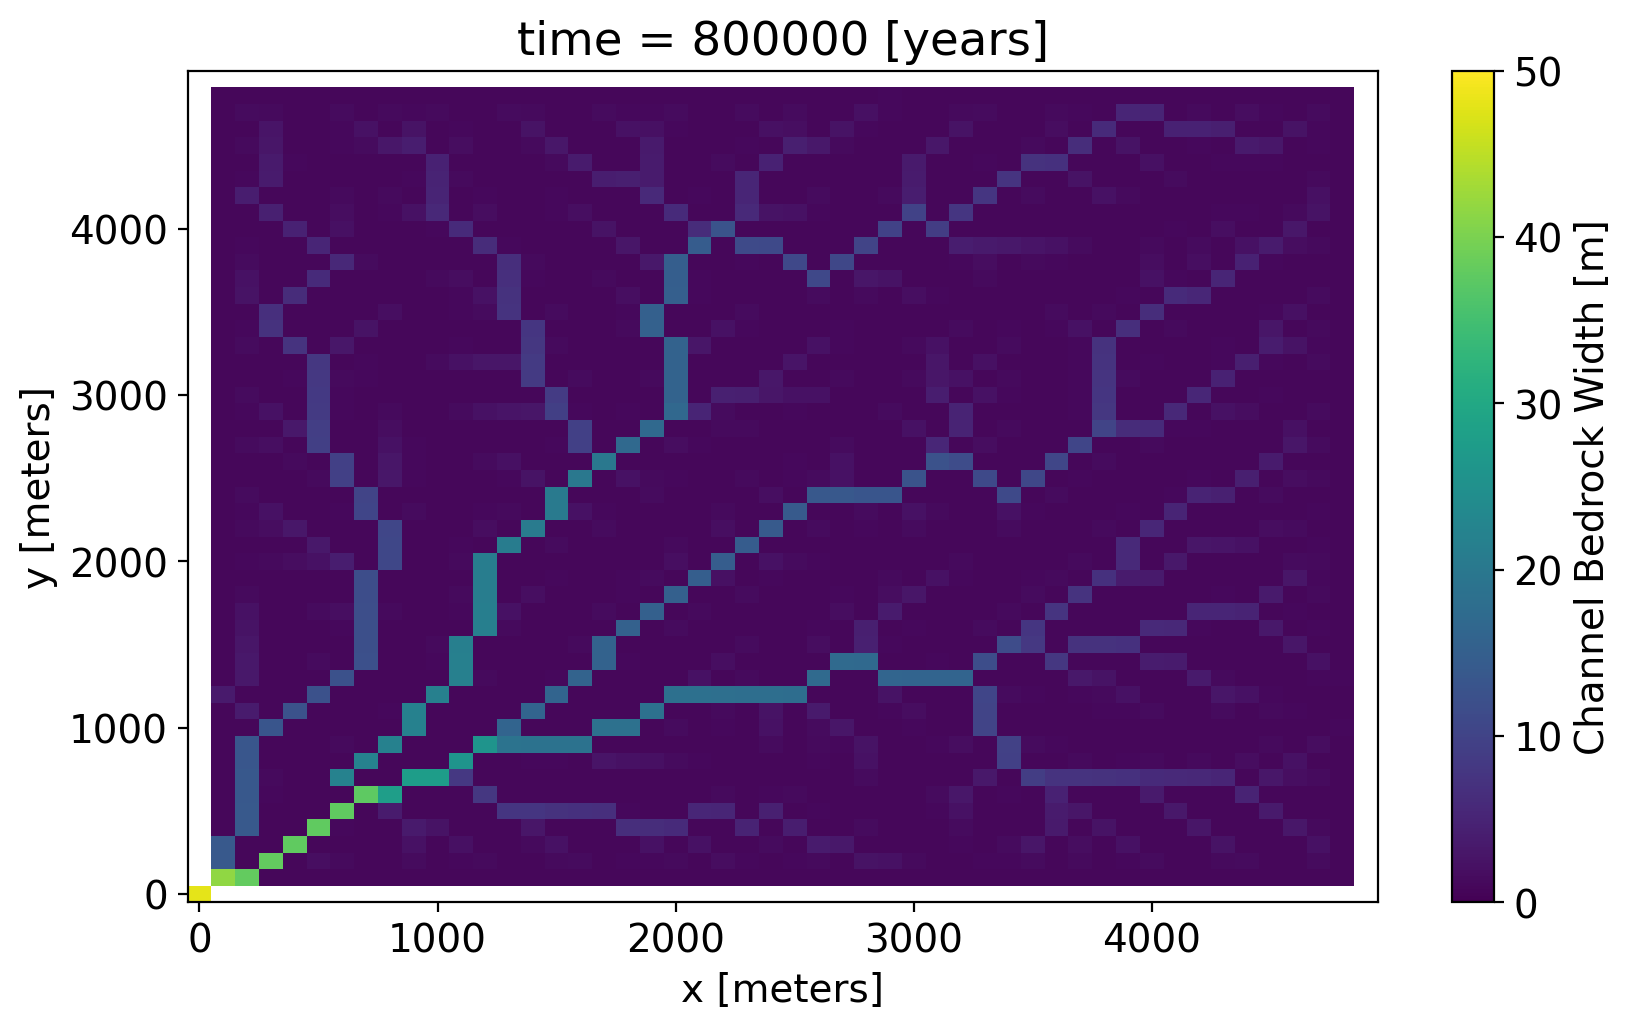

In [7]:
#Create a movie object
width_mov = Movie(ds.channel_bedrock__width, vmin=0, vmax=50, cmap='viridis')

#Preview a specific frame - in this case, Frame 100
width_mov.preview(800)

In [6]:
#cd 'C:\\Users\\gjg882\\Desktop\\Projects\\SpaceDynamicWidth\\NormalFaultSims//MovieFrames'



  0%|          | 0/801 [00:00<?, ?it/s]


KeyboardInterrupt



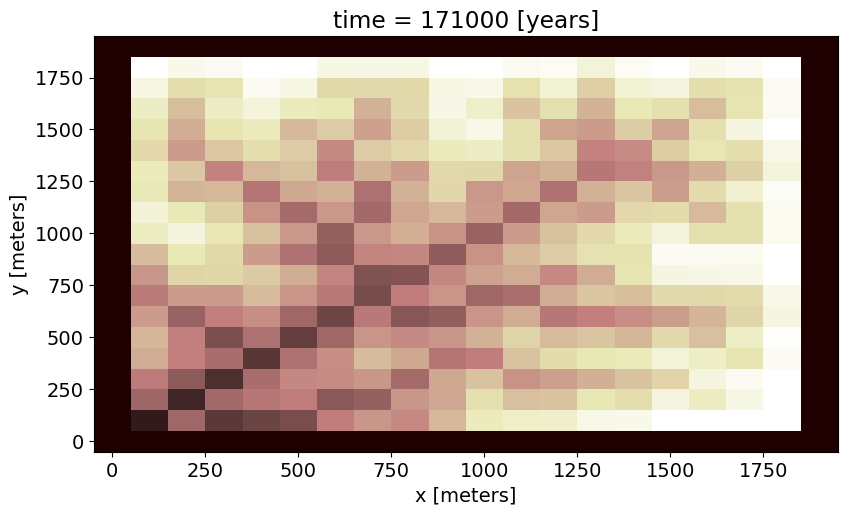

In [ ]:
topo_mov.save(filename='topo_mov.mp4',
          progress=True, 
          overwrite_existing=True, 
          verbose=True)